In [1]:
from utils.packages import *
from utils.functions import *

In [2]:
df = pd.read_csv('data/Corona_NLP_train.csv', encoding = "ISO-8859-1")

df = df[['OriginalTweet', 'Sentiment']]
df['OriginalTweet'] = df['OriginalTweet'] + " § "
text = df['OriginalTweet'].str.lower().to_csv(sep=' ', index=False, header=False).lower()

full_tokens = word_tokenize(text)
tokens = [word for word in full_tokens if word.isalpha()]
tokens = [word for word in tokens if len(word)>1]   

tokens[1:5]

['chrisitv', 'https', 'and', 'https']

---------------------------------- Analysis Results ----------------------------------
1. Most frequent 859 unique words, which are 2.0% of the total distinct words, are contributing to the 75% of the total corpus.
2. Least frequent 45536 unique words, which are 92.0% of the total distinct words, are contributing only to the bottom 10% of the total corpus.
--------------------------------------------
   num_of_words  dist_words%  corpus%
0           859          2.0       75
1          1347          3.0       80
2          2204          4.0       85
3          3961          8.0       90
4          9206         19.0       95
5         43746         88.0      100
--------------------
num_of_words : Distinct count of Top-most frequent words
dist_words%  : num_of_words / total distinct words in corpus
corpus%      : Total count of num_of_words / Total number of words in corpus
--------------------------------------------


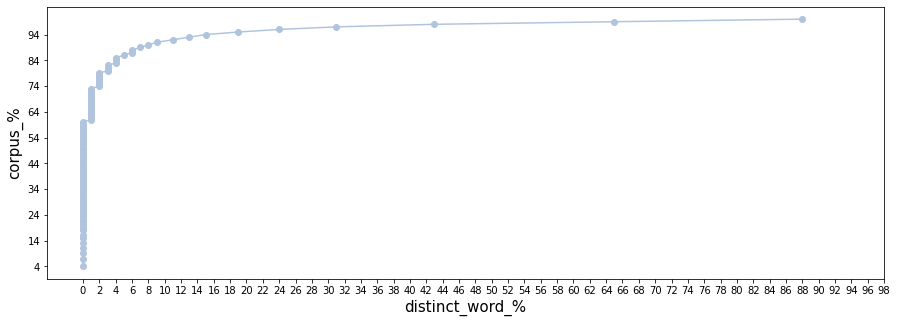

In [4]:
freqdf, small_freq_df, df_report = dynamic_stop_word_analyzer(tokens)

In [10]:
df_report

,num_of_words,dist_words%,corpus%
0,859,2.0,75
1,1347,3.0,80
2,2204,4.0,85
3,3961,8.0,90
4,9206,19.0,95
5,43746,88.0,100


In [5]:
x = 75
freqdf[x:x+5]

,sno,word,count,distinct_word_%,cumsum,corpus_%
75,76,home,2230,0.0,510258,44.0
76,77,some,2160,0.0,512418,45.0
77,78,help,2136,0.0,514554,45.0
78,79,hand,2065,0.0,516619,45.0
79,80,stock,1974,0.0,518593,45.0


In [6]:
small_freq_df[x:x+5]

,sno,word,count,distinct_word_%,cumsum,corpus_%
2452,2453,infections,43,5.0,983491,86.0
2742,2743,paycheck,37,6.0,995019,87.0
3077,3078,division,32,6.0,1006506,88.0
3476,3477,telehealth,26,7.0,1017993,89.0
3960,3961,diabetes,22,8.0,1029499,90.0


In [7]:
corpus_perc_threshold = 85
stop_words_skip_list = []

stop_words_list, non_stop_words_list = get_dynamic_stop_words_list(freqdf, corpus_perc_threshold, stop_words_skip_list)

-----------------------------
non_stop_words_list has 2203 words e.g.(['shared', 'distribute', 'walk', 'waiting'])
stop_words_list has 47045 words e.g.(['closings', 'tablespoon', 'wechat', 'mbagathi'])
-----------------------------


In [13]:
nltk_stopwords = stopwords.words('english')

tokens = [word for word in full_tokens if word == "§" or word.isalpha()]
tokens = [word for word in tokens if word == "§" or len(word)>1]
tokens = [word for word in tokens if word == "§" or word not in nltk_stopwords]

print(f'Number of words in corpus before dynamic stopword removal : {len(tokens)} (distinct : {len(set(tokens))})')
tokens = [word for word in tokens if word == "§" or word in non_stop_words_list]
print(f'Number of words in corpus before dynamic stopword removal : {len(tokens)} (distinct : {len(set(tokens))})')

message, joined_message = create_tokens_list_of_list(tokens)

df['reduced_tweet'] = joined_message

Number of words in corpus before dynamic stopword removal : 760872 (distinct : 49357)
Number of words in corpus before dynamic stopword removal : 583085 (distinct : 2086)


In [9]:
df.head()

,OriginalTweet,Sentiment,reduced_tweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,https https https
1,advice Talk to your neighbours family to excha...,Positive,advice talk family phone numbers create contac...
2,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths give elderly ...
3,My food stock is not the only one which is emp...,Positive,food stock one empty please panic enough food ...
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,ready go supermarket outbreak food stock empty...
